# Summary of Quantum Operations 

In [19]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector,plot_state_qsphere
import matplotlib.pyplot as plt

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

![img](https://www.datocms-assets.com/5203/1534934969-blochspphere.jpg?auto=compress&auto=quality&w=596)

-------

### Qubit flipping

#### 1.  $\psi = |0 \rangle;  \psi = \begin{bmatrix}  1 \\ 0  \end{bmatrix}$

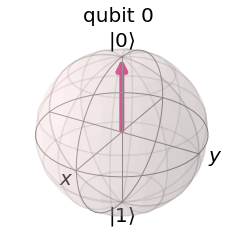

In [49]:
q = np.array([1.+0.j, 0.+0.j])
plot_bloch_multivector(q)

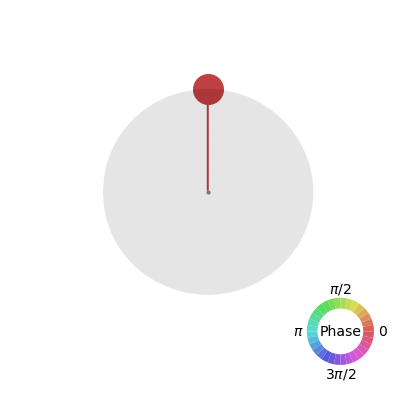

In [50]:
plot_state_qsphere(q)

#### 2.  $\psi = |1 \rangle;  \psi = \begin{bmatrix}  0 \\ 1  \end{bmatrix}$

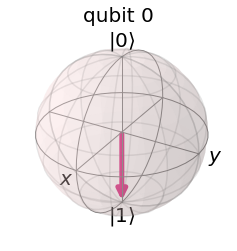

In [51]:
q = np.array([0.+0.j, 1.+0.j])
plot_bloch_multivector(q)

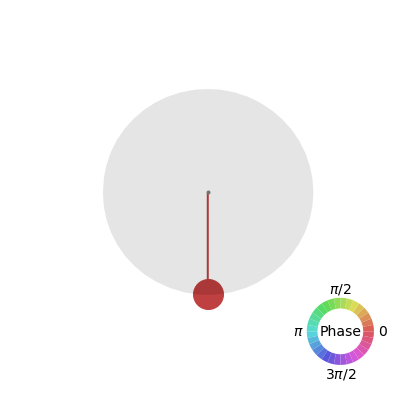

In [52]:
plot_state_qsphere(q)

#### Experiment 1:

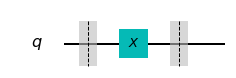

In [53]:
qc = QuantumCircuit(1)
qc.barrier()
qc1 = qc.copy()
qc.x(0)
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl')

In [54]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [0.+0.j 1.+0.j]


### Superposition

#### 3.  $\psi =  \frac{1}{\sqrt{2}} |0\rangle  + \frac{1}{\sqrt{2}} |1 \rangle ; \psi = \frac{1}{\sqrt{2}}\begin{bmatrix}  1 \\ 1  \end{bmatrix}$ 

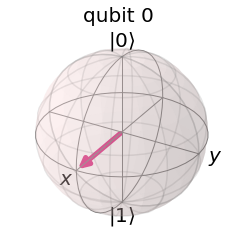

In [55]:
q = np.array([1/np.sqrt(2)+0.j, 1/np.sqrt(2)+0.j])
plot_bloch_multivector(q)

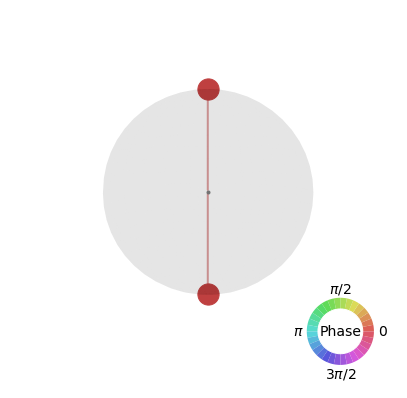

In [56]:
plot_state_qsphere(q)

#### 4.  $\psi =  \frac{1}{\sqrt{2}} |0\rangle  - \frac{1}{\sqrt{2}} |1 \rangle ; \psi = \frac{1}{\sqrt{2}}\begin{bmatrix}  1 \\ -1  \end{bmatrix}$ 

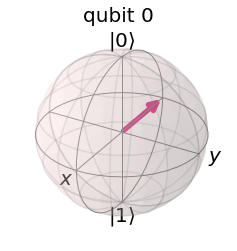

In [57]:
q = np.array([1/np.sqrt(2)+0.j, -(1/np.sqrt(2))+0.j])
plot_bloch_multivector(q)

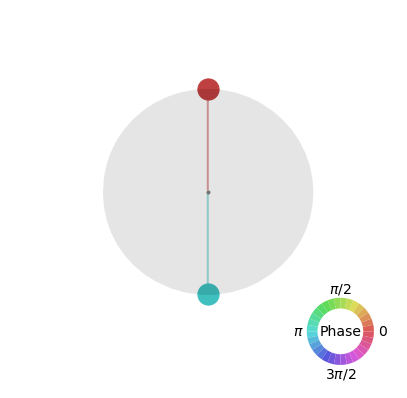

In [58]:
plot_state_qsphere(q)

#### Experiment 2 : 

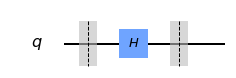

In [59]:
qc = QuantumCircuit(1)
qc.barrier()
qc1 = qc.copy()
qc.h(0)
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl')

 - $\psi_1 = |0 \rangle$ and  $\psi_2 =  \frac{1}{\sqrt{2}} |0\rangle  + \frac{1}{\sqrt{2}} |1 \rangle$

In [60]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [0.70710678+0.j 0.70710678+0.j]


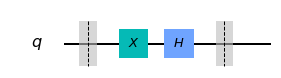

In [61]:
qc = QuantumCircuit(1)
qc.barrier()
qc1 = qc.copy()
qc.x(0)
qc.h(0)
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl')

 - $\psi_1 = |1 \rangle$ and  $\psi_2 =  \frac{1}{\sqrt{2}} |0\rangle  - \frac{1}{\sqrt{2}} |1 \rangle$

In [62]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]
